In [8]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import os
# os.listdir('/kaggle/input')
import spacy

In [9]:
nlp = spacy.load('en_core_web_sm')

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/siddanta/nltk_data...

[nltk_data]   Package punkt is already up-to-date!

[nltk_data] Downloading package stopwords to

[nltk_data]     /Users/siddanta/nltk_data...

[nltk_data]   Package stopwords is already up-to-date!

[nltk_data] Downloading package wordnet to

[nltk_data]     /Users/siddanta/nltk_data...

[nltk_data]   Package wordnet is already up-to-date!

[nltk_data] Downloading package omw-1.4 to

[nltk_data]     /Users/siddanta/nltk_data...

[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
def filter_rows(chunk):
    return chunk[chunk['language_cld3'] == 'en']

# Read the CSV file in chunks and filter rows with 'en'
filtered_chunks = []
chunk_size = 10000  # Adjust this value based on your memory constraints

for chunk in pd.read_csv('final project/song_lyrics.csv', chunksize=chunk_size):
    filtered_chunk = filter_rows(chunk)
    filtered_chunks.append(filtered_chunk)

# Concatenate the filtered chunks into a single DataFrame
filtered_data = pd.concat(filtered_chunks, ignore_index=True)

In [5]:
filtered_data

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en
...,...,...,...,...,...,...,...,...,...,...,...
3399988,Everything Is Alright Now,pop,Chuck Bernard,2013,2,{},"Everything is alright now\nOh yes, baby\nEvery...",7882838,en,en,en
3399989,White Lies,pop,ElementD,2019,1,"{""Harley Bird""}",[Verse 1]\nHalf truth and half you\nDidn't we ...,7882840,en,en,en
3399990,Ocean,pop,Effemar,2022,3,{},[Verse 1]\nDance for me now\nKeeping yourself ...,7882842,en,en,en
3399991,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,3,"{Elex,""Culture Code / Pag & Mylo""}",[Verse 1]\nHere our purpose feels alive\nWe ar...,7882845,en,en,en


In [9]:
df = filtered_data[['title','tag','artist','year','views','features','lyrics']]
df.rename(columns={'tag': 'genre'}, inplace=True)
df = df[(df['year'] <2024) & (df['year'] > 1990)]
df = df.reset_index(drop=True)
# Convert the 'date' column to datetime type (if not already in datetime type)
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_50437/2404264321.py:2: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.rename(columns={'tag': 'genre'}, inplace=True)


In [10]:
df

,title,genre,artist,year,views,features,lyrics
0,Killa Cam,rap,Cam'ron,2004-01-01,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki..."
1,Can I Live,rap,JAY-Z,1996-01-01,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,..."
2,Forgive Me Father,rap,Fabolous,2003-01-01,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...
3,Down and Out,rap,Cam'ron,2004-01-01,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...
4,Fly In,rap,Lil Wayne,2005-01-01,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ..."
...,...,...,...,...,...,...,...
3145477,Everything Is Alright Now,pop,Chuck Bernard,2013-01-01,2,{},"Everything is alright now\nOh yes, baby\nEvery..."
3145478,White Lies,pop,ElementD,2019-01-01,1,"{""Harley Bird""}",[Verse 1]\nHalf truth and half you\nDidn't we ...
3145479,Ocean,pop,Effemar,2022-01-01,3,{},[Verse 1]\nDance for me now\nKeeping yourself ...
3145480,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016-01-01,3,"{Elex,""Culture Code / Pag & Mylo""}",[Verse 1]\nHere our purpose feels alive\nWe ar...


In [11]:
df.describe()

,views
count,3.145482e+06
mean,3.637666e+03
std,5.647433e+04
min,0.000000e+00
25%,2.100000e+01
50%,8.300000e+01
75%,4.510000e+02
max,1.757563e+07


## Artist Contribution

In [12]:
top_10_artists = df.groupby('artist')['views'].sum().sort_values(ascending=False)
top_10_artists.head(15)

artist
Drake                          290162939
Eminem                         199872883
Kanye West                     165409187
Genius English Translations    164330365
Kendrick Lamar                 148672204
The Weeknd                     118923729
Taylor Swift                    99106550
J. Cole                         95502182
XXXTENTACION                    90833906
Ariana Grande                   74327680
Travis Scott                    67504519
Lil Wayne                       65663738
JAY-Z                           64044686
Frank Ocean                     61528210
Beyonc                          59759399
Name: views, dtype: int64

<Axes: title={'center': 'Counts by Year'}, xlabel='Year', ylabel='Counts'>

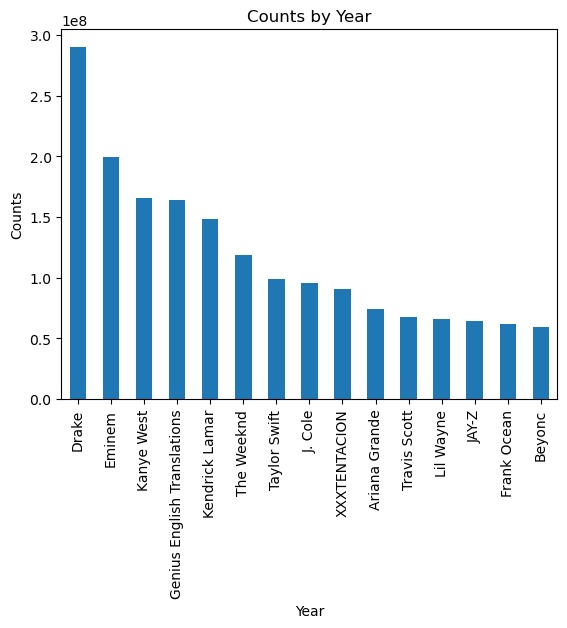

In [13]:
top_10_artists.head(15).plot(kind='bar', xlabel='Year', ylabel='Counts', title='Counts by Year')

In [14]:
artists_by_no_of_songs = df.groupby('artist')['title'].size().sort_values(ascending=False)
artists_by_no_of_songs

artist
Genius English Translations    13531
The Grateful Dead               1467
Abraham Lincoln                 1467
Lil B                           1315
Gucci Mane                      1254
                               ...  
Mornings                           1
DirtyDan and Geez                  1
DirtyDan & Lightskin Hesus         1
DirtyBlak4mb                       1
PicoZoGame                         1
Name: title, Length: 423355, dtype: int64

In [15]:
df[df['artist'] == 'Genius English Translations']

,title,genre,artist,year,views,features,lyrics
49231,Erika - O que sinto por ti ft. Alkappa English...,rap,Genius English Translations,2011-01-01,70,{},Chorus (1)\nI will not say anything but\nBut I...
50892,Stromae - Alors On Danse English Translation,rap,Genius English Translations,2010-01-01,222064,{},[Intro]\nSo we …\nSo we …\nSo we …\n\n[Verse 1...
51558,Alkappa - Dá pra confiar English Translation,rap,Genius English Translations,2011-01-01,48,{},Artist: Alkappa\nLetter: Andrew lando kixindo\...
52023,G-Dragon - 쿠데타 Coup detat ft. Baauer Diplo En...,rap,Genius English Translations,2013-01-01,37096,{},[Intro]\nPeople\nThe revolution will not be te...
53884,Halete Mc - Exacto e errado Translation,rap,Genius English Translations,2012-01-01,52,{},[Verse 1: Halide Mc]\nTou simply wrong because...
...,...,...,...,...,...,...,...
3145398,Foé - Nuria English translation,pop,Genius English Translations,2018-01-01,2,{},[Verse 1]\nMy words tense under your story\nTh...
3145408,Foé - Running English translation,pop,Genius English Translations,2018-01-01,2,{},[Verse 1]\nFeet grazing the sole\nDead bodies ...
3145417,Foé - Mommy,pop,Genius English Translations,2018-01-01,3,{},"[Intro (originally in English)]\nHey mum, hey ..."
3145428,Foé - Edgar English translation,pop,Genius English Translations,2018-01-01,2,{},"[Verse 1]\nYou've got the liver, Edgar\nWith m..."


In [16]:
df = df[df['artist'] != 'Genius English Translations']

In [17]:
df[df['artist'] == 'Abraham Lincoln']

,title,genre,artist,year,views,features,lyrics
79363,The Lyceum Address,misc,Abraham Lincoln,2012-01-01,3016,{},"As a subject for the remarks of the evening, ""..."
111735,The Papers And Writings Of Abraham Lincoln-VOL...,misc,Abraham Lincoln,2013-01-01,3,{},"To N. J. Rockwell.\n\nSpringfield, January 21,..."
111765,The Papers And Writings Of Abraham Lincoln-VOL...,misc,Abraham Lincoln,2013-01-01,10,{},"To Wm. H. Herndon\n\nExecutive Mansion, Washin..."
111859,The Papers And Writings Of Abraham Lincoln-VOL...,misc,Abraham Lincoln,2013-01-01,4,{},Reassuring Son In College\n\nTelegram To Rober...
111883,The Papers And Writings Of Abraham Lincoln-VOL...,misc,Abraham Lincoln,2013-01-01,8,{},Telegram To Governor Gamble.\n\nWar Department...
...,...,...,...,...,...,...,...
1188776,Fourth Debate with Douglas September 18 1858,misc,Abraham Lincoln,2016-01-01,46,{},"Fourth Debate with Stephen Douglas, Charleston..."
1191313,Letter to Joshua Speed August 24 1855,misc,Abraham Lincoln,2016-01-01,5,{},"October 3, 1855 -Letter to Joshua Speed\n\nSpr..."
1191324,August 14 1862 -Abraham Lincoln Remarks on Col...,misc,Abraham Lincoln,2016-01-01,38,{},"August 14, 1862 -Abraham Lincoln, Remarks on C..."
1192116,Letter to Mary Todd Lincoln April 16 1848,misc,Abraham Lincoln,2016-01-01,5,{},"Washington, April 16- 1848-\n\nDear Mary:\nIn ..."


In [18]:
df[df['genre'] == 'misc']

,title,genre,artist,year,views,features,lyrics
660,Penny for a Thought,misc,Saul Williams,2001-01-01,6118,{},Cancel the apocalypse!\nCartons of the milky w...
1264,John 1,misc,Holy Bible (KJV),2017-01-01,3375,{},"John 1:1: In the beginning was the Word, and t..."
1265,John 2,misc,Holy Bible (KJV),2017-01-01,983,{},John 2:1: And the third day there was a marria...
1266,John 3,misc,Holy Bible (KJV),2017-01-01,2129,{},"John 3:1: There was a man of the Pharisees,\nn..."
1352,Her It,misc,John Berryman,2010-01-01,356,{},I fell in love with a girl\nO and a gash\nI'll...
...,...,...,...,...,...,...,...
3145038,Only the sea,misc,Hannah Gira,2022-01-01,3,{},"Rose, harsh rose\nAre you calling me?\nI did n..."
3145063,In Conversation with Eli Intro - Radio Edit,misc,Jarrett Brice,2022-01-01,1,{},"Eli: Now, welcome our first guest; he’s my fri..."
3145387,Vulture,misc,MIND REPLICA,2021-01-01,3,{},i'm a fucking vulture\na fucking vulture for y...
3145411,4 Ways to Have Fun at the Beach,misc,Dave,2022-01-01,0,{},"When it comes to summertime, the beach is alwa..."


In [19]:
df = df[df['genre'] != 'misc']

In [20]:
artists_by_no_of_songs = df.groupby('artist')['title'].size().sort_values(ascending=False)
artists_by_no_of_songs

artist
The Grateful Dead    1467
Lil B                1309
Gucci Mane           1240
Lil Wayne            1213
KIDZ BOP Kids        1209
                     ... 
Fuel Moon               1
Fuel (Hardcore)         1
Omar Adel               1
Fuegowiththesucc        1
Dodger                  1
Name: title, Length: 402929, dtype: int64

<Axes: title={'center': 'Artist Contribution'}, xlabel='Artist', ylabel='No of songs'>

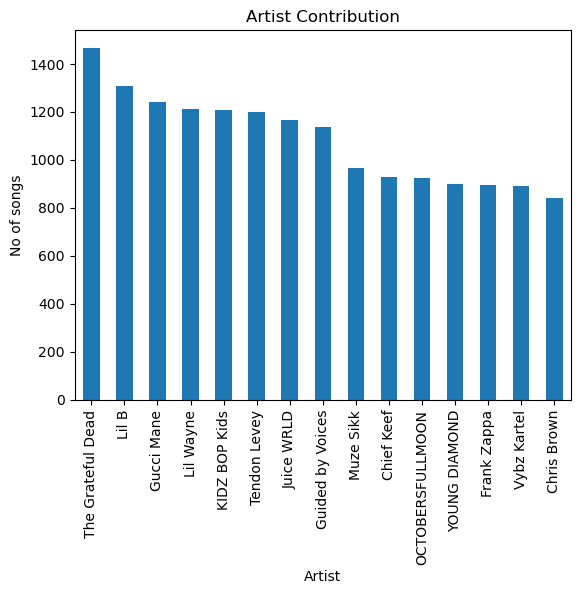

In [29]:
artists_by_no_of_songs.head(15).plot(kind='bar', xlabel='Artist', ylabel='No of songs', title='Artist Contribution')

## Top Songs

In [22]:
df.sort_values(by='views', ascending=False).head(10)

,title,genre,artist,year,views,features,lyrics
164027,Rap God,rap,Eminem,2013-01-01,17575634,{},"[Intro]\n""Look, I was gonna go easy on you not..."
2416782,WAP,rap,Cardi B,2020-01-01,16003444,"{""Megan Thee Stallion""}","[Intro: Cardi B, Al ""T"" McLaran & Megan Thee S..."
1259052,Shape of You,pop,Ed Sheeran,2017-01-01,14569727,{},[Verse 1]\nThe club isn't the best place to fi...
1300237,HUMBLE.,rap,Kendrick Lamar,2017-01-01,11181199,{},[Intro]\nNobody pray for me\nIt been that day ...
312744,The Hills,rb,The Weeknd,2015-01-01,9291775,{},[Intro]\nYeah\nYeah\nYeah\n\n[Verse 1]\nYour m...
1201067,Bad and Boujee,rap,Migos,2016-01-01,9168421,"{""Lil Uzi Vert""}","[Intro: Offset & Future]\nYou know, young rich..."
1434993,Gods Plan,rap,Drake,2018-01-01,9107059,{},[Intro]\nAnd they wishin' and wishin'\nAnd wis...
1658445,SICKO MODE,rap,Travis Scott,2018-01-01,9078511,{Drake},"[Part I]\n\n[Intro: Drake]\nAstro, yeah\nSun i..."
1738682,​thank u next,pop,Ariana Grande,2018-01-01,9072131,{},[Verse 1]\nThought I'd end up with Sean\nBut h...
1400408,Mans Not Hot,rap,Big Shaq,2017-01-01,8690766,{},"[Intro]\nYo\nBig Shaq, the one and only\nMan's..."


## Checking by Year

In [23]:
count_by_year = df.groupby(df['year'].dt.year)['title'].size()

<Axes: title={'center': 'Counts by Year'}, xlabel='Year', ylabel='No of songs'>

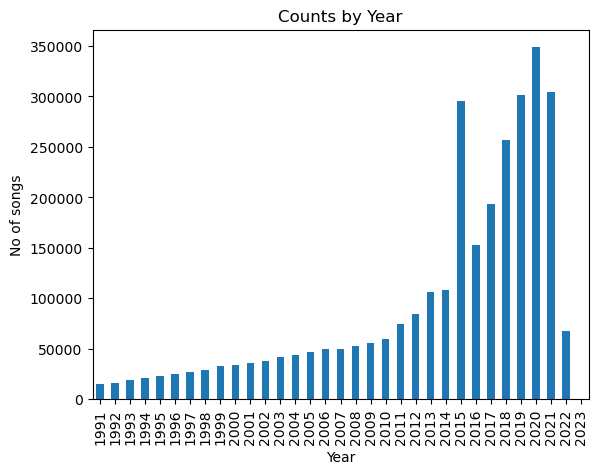

In [28]:
count_by_year.plot(kind='bar', xlabel='Year', ylabel='No of songs', title='Counts by Year')

## Count by genre

In [25]:
count_by_genre = df.groupby(df['genre'])['views'].size()

<Axes: title={'center': 'Genre song distribution'}, xlabel='Genre', ylabel='Number of songs'>

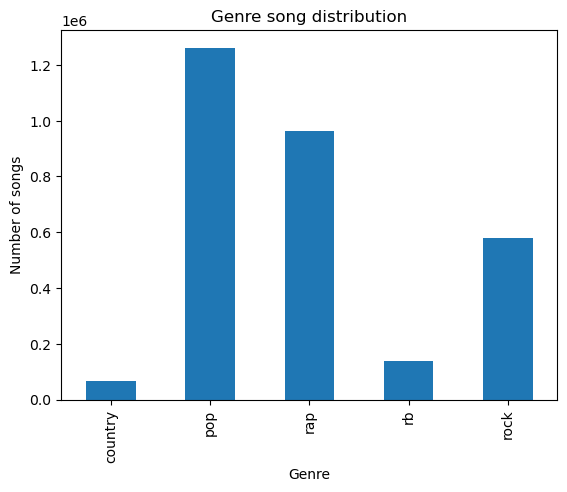

In [27]:
count_by_genre.plot(kind='bar', xlabel='Genre', ylabel='Number of songs', title='Genre song distribution')

In [30]:
# Calculate the total views
total_views = count_by_genre.sum()

# Convert sum of 'views' to percentage relative to total views
percentage_by_genre = (count_by_genre / total_views) * 100

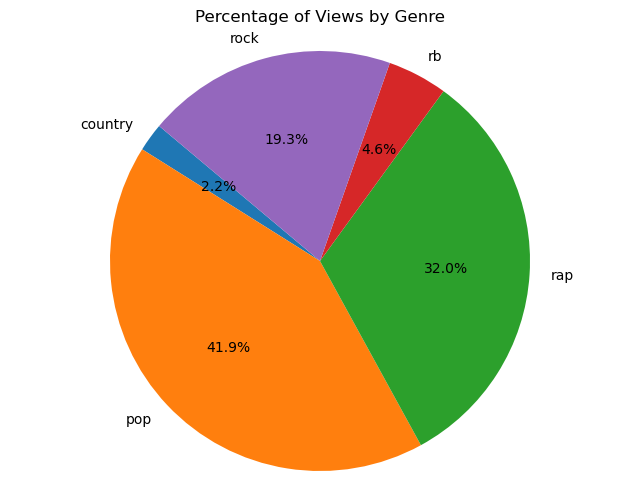

In [31]:
plt.figure(figsize=(8, 6))
plt.pie(percentage_by_genre, labels=percentage_by_genre.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of Views by Genre')
plt.show()

In [32]:
filterdf = pd.DataFrame()
for i in df['genre'].unique():
    filterdf = pd.concat([filterdf,df[df['genre']==i].nlargest(count_by_genre.min(), 'views')], ignore_index=True)

In [33]:
filterdf = filterdf.sample(frac=1).reset_index(drop=True)
filterdf

,title,genre,artist,year,views,features,lyrics
0,Haunting interlude,rap,clipping.,2019-01-01,9883,{​clipping.},"""After I had moved into my apartment two weeks..."
1,Paint The Town Red,pop,The Mahones,1996-01-01,4103,{},"[Intro]\nYeah\n\n[Verse 1]\nHey there, where y..."
2,We Win Again,country,Steve Caustrita,2021-01-01,20,"{""Stanley Loh""}","We Win Again\n© June 16, 2020 Stan Loh & Steve..."
3,ROBLOXCORE : XD LOL,rap,Various Artists,2020-01-01,8521,"{​dltzk,​twikipedia,Dolly,​lieu}","[Verse 1: Dolly]\nI know you hate me, that's j..."
4,Must Be Nice,rock,Nickelback,2017-01-01,18193,{},"[Verse 1]\nOne step, two step, electric slide\..."
...,...,...,...,...,...,...,...
329350,Will He On the Nyquil Benadryl,rb,Yung Schmoobin,2018-01-01,185,{},"[Intro]\nYah, Yung Schmoobin\nAnd I just like ..."
329351,Home Alone,country,4 Runner,1995-01-01,58,{},I've been thinkin' about you\n\nThe alarm cloc...
329352,Stubborn Kind of Fellow,rb,Stevie Wonder,1995-01-01,156,{},"[Intro]\n(Doo, doo, doo, oh)\nSay yeah, yeah, ..."
329353,Daddy Thing,rb,Jaheim,2006-01-01,377,{},Who did the daddy thing?\nWhen her father wasn...


## Filtering Lyrics

In [34]:
def unprocessed_lyrics(lyrics_text):
    bracket_pattern = r'\[.*?\]'
    cleaned_lyrics = re.sub(bracket_pattern, '', lyrics_text)
    cleaned_lyrics = cleaned_lyrics.replace('\n', ' ')
    return cleaned_lyrics

In [35]:
filterdf['lyrics'] = [unprocessed_lyrics(text) for text in filterdf['lyrics']]

In [36]:
import swifter

In [109]:
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer        # module for stemming
from textblob import Word
import re
# Define a list of contractions and their full forms
contractions = {
    "im": "i am",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not"
    # Add more contractions as needed
}


def preprocess_lyrics(lyrics):
    # Step 1: Convert to lowercase
    lyrics = lyrics.lower()

    # Remove special symbols
    lyrics = re.sub(r'[^\w\s]', '', lyrics)
    
        # Replace contractions with their full forms
    for contraction, full_form in contractions.items():
        lyrics = re.sub(r'\b' + re.escape(contraction) + r'\b', full_form, lyrics)
        
    # Step 2: Tokenization using TweetTokenizer
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(lyrics)
    
#     lemmatized_tokens = [token.lemma_ for token in nlp(' '.join(tokens))]

    # Step 3: Remove punctuation and special characters
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens if re.sub(r'[^a-zA-Z0-9]', '', token)]

    # Step 4: Remove numbers
    tokens = [token for token in tokens if not token.isdigit()]

    # Step 5: Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Step 6: Lemmatization using NLTK's WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    
    # Step 7: Join the tokens back into a string
    processed_lyrics = ' '.join(tokens)

    return processed_lyrics

# Example usage
# Assuming you have a large DataFrame 'df' with a column 'lyrics'
# and you want to preprocess the 'lyrics' column

# Use swifter to perform parallel processing
filterdf['processed_lyrics'] = filterdf['lyrics'].swifter.apply(preprocess_lyrics)

Pandas Apply:   0%|          | 0/329355 [00:00<?, ?it/s]

In [118]:
# new_df = filterdf[filterdf.columns[filterdf.columns != 'lyrics']]

In [119]:
# new_df.to_csv('filterdf_first_step.csv', index=False)

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_50437/3912243715.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator

  ax.set_xticklabels(words, rotation=45, ha='right')


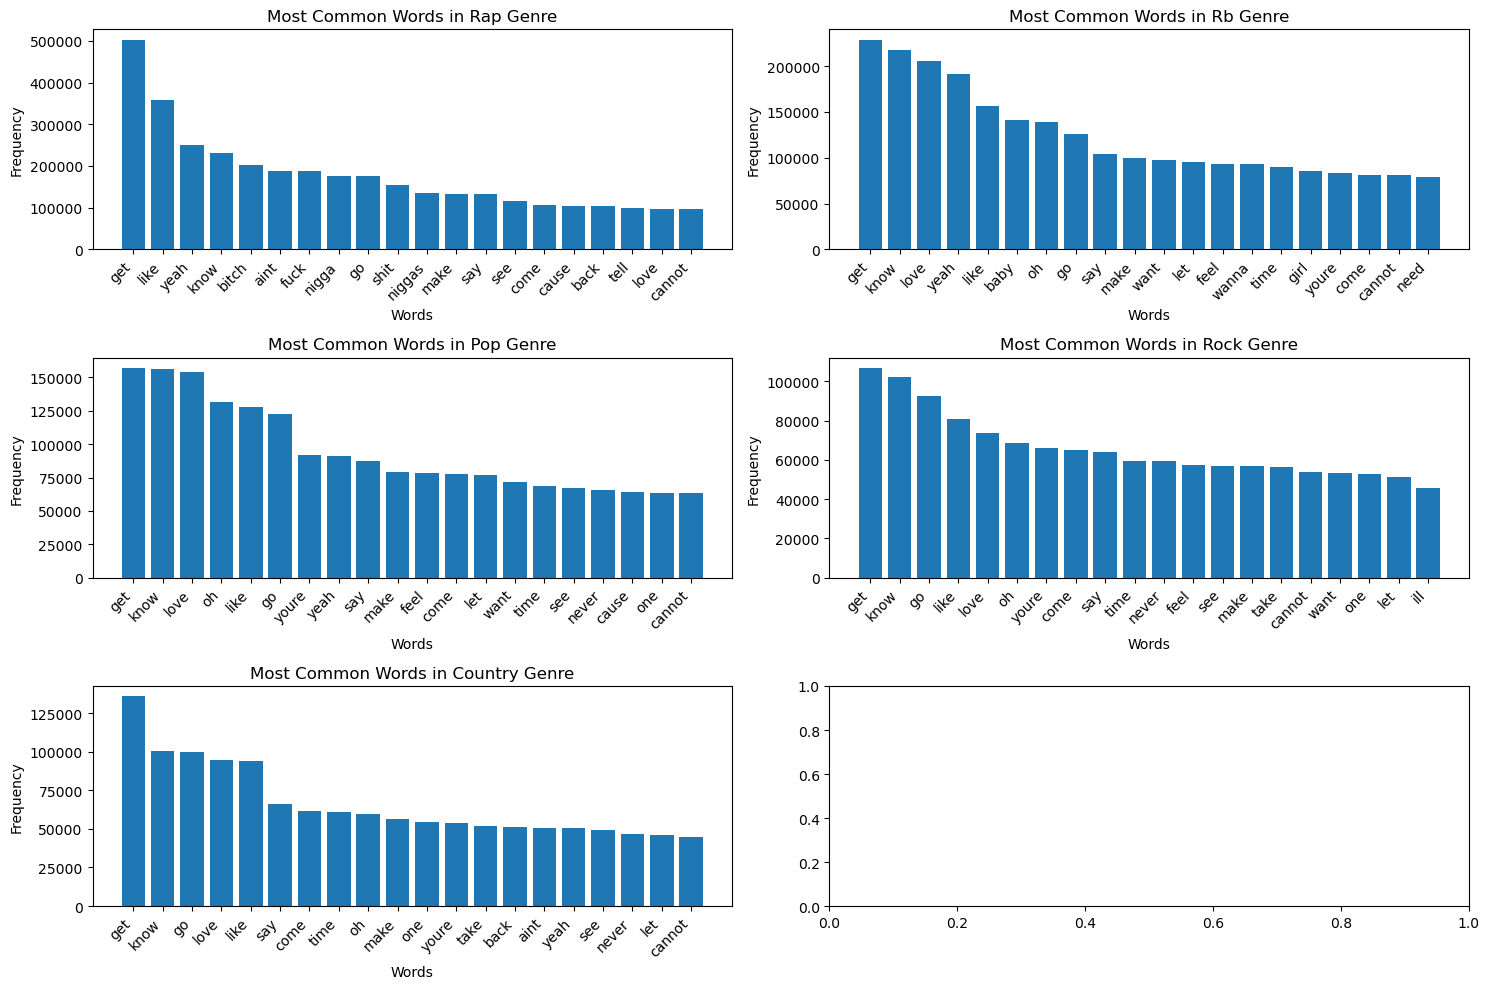

In [122]:
from itertools import chain
from collections import Counter
# Include this line to display plots inline in the notebook
%matplotlib inline

genres = ['rap', 'rb', 'pop', 'rock', 'country']

# Calculate the number of rows and columns for the subplot grid
num_rows = len(genres) // 2 + len(genres) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for idx, genre in enumerate(genres):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    
    genre_df = filterdf[filterdf['genre'] == genre]
    all_lines = [text.split() for text in genre_df['processed_lyrics']]
    flat_list = list(chain.from_iterable(all_lines))
    word_counts = Counter(flat_list)
    
    # Visualize word frequency (top N words)
    top_n = 20
    common_words = word_counts.most_common(top_n)
    words, counts = zip(*common_words)
    
    ax.bar(words, counts)
    ax.set_xticklabels(words, rotation=45, ha='right')
    ax.set_xlabel('Words')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Most Common Words in {genre.capitalize()} Genre')

# Adjust layout and spacing between subplots
plt.tight_layout()
plt.show()


In [13]:
filterdf['year']=pd.to_datetime(filterdf['year'])
new_df = filterdf[filterdf['year'].dt.year > 2020]
new_df=new_df.reset_index(drop=True)


In [14]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
max_seq_length = 128
batch_size = 6
learning_rate = 5e-7
# Sample dataset
songs = new_df['processed_lyrics']  # List of song lyrics
genres = new_df['genre'] # List of corresponding genre labels
num_classes=len(set(new_df['genre']))
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(songs, genres, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)

# Move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Convert genre labels to numeric IDs
label2id = {genre: i for i, genre in enumerate(set(y_train))}
train_label_ids = [label2id[label] for label in y_train]
val_label_ids = [label2id[label] for label in y_val]
test_label_ids = [label2id[label] for label in y_test]

# Tokenize and encode the lyrics
train_inputs = tokenizer(list(X_train), padding=True, truncation=True, return_tensors="pt", max_length=128)
val_inputs = tokenizer(list(X_val), padding=True, truncation=True, return_tensors="pt", max_length=128)
test_inputs = tokenizer(list(X_test), padding=True, truncation=True, return_tensors="pt", max_length=128)

train_data = torch.utils.data.TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], torch.tensor(train_label_ids))
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

val_data = torch.utils.data.TensorDataset(val_inputs['input_ids'], val_inputs['attention_mask'], torch.tensor(val_label_ids))
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)

test_data = torch.utils.data.TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], torch.tensor(test_label_ids))
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

# Train the model
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

criterion = torch.nn.CrossEntropyLoss()
best_val_loss = float('inf')  # Initialize with a high value
best_model_weights = None
# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.1)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = criterion(outputs.logits, labels)  # Calculate the loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    # Validation
    model.eval()
    with torch.no_grad():
        val_losses = []
        val_predictions = []
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            val_loss = criterion(outputs.logits, labels)

            val_losses.append(val_loss.item())
            predicted_labels = torch.argmax(outputs.logits, dim=1)
            val_predictions.extend(predicted_labels.tolist())
        avg_val_loss = sum(val_losses) / len(val_losses)
        val_accuracy = (sum([1 if pred == true_label else 0 for pred, true_label in zip(val_predictions, val_label_ids)]) / len(val_label_ids))
        print(f"Epoch {epoch+1} - Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        # Learning rate scheduling
        scheduler.step(avg_val_loss)

        # Save best model weights
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_weights = model.state_dict()
            torch.save(best_model_weights, 'best_model_weights1.pth')
        else:
            # If validation loss increases for a certain number of consecutive epochs, stop training
            early_stopping_patience = 3
            if epoch >= early_stopping_patience:
                print(f"Validation loss hasn't improved for {early_stopping_patience} epochs. Stopping.")
                break

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Epoch 1 - Validation Loss: 1.1954, Validation Accuracy: 0.5422
Epoch 2 - Validation Loss: 1.0338, Validation Accuracy: 0.5880
Epoch 3 - Validation Loss: 0.9740, Validation Accuracy: 0.6132
Epoch 4 - Validation Loss: 0.9451, Validation Accuracy: 0.6215
Epoch 5 - Validation Loss: 0.9424, Validation Accuracy: 0.6259
Epoch 6 - Validation Loss: 0.9286, Validation Accuracy: 0.6332
Epoch 7 - Validation Loss: 0.8956, Validation Accuracy: 0.6478
Epoch 8 - Validation Loss: 0.8964, Validation Accuracy: 0.6502
Validation loss hasn't improved for 3 epochs. Stopping.


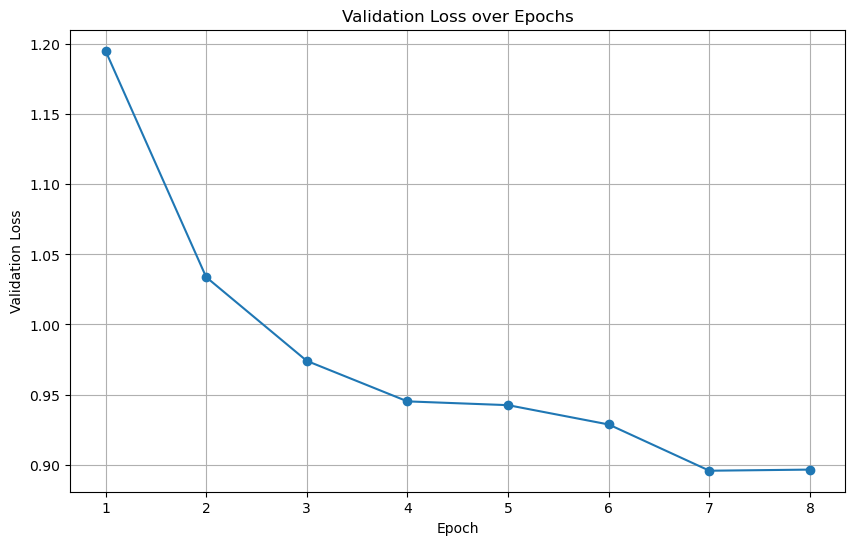

In [19]:
import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5, 6, 7, 8]

plt.figure(figsize=(10, 6))

plt.plot(epochs, avg_loss, marker='o')

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.grid()

plt.show()

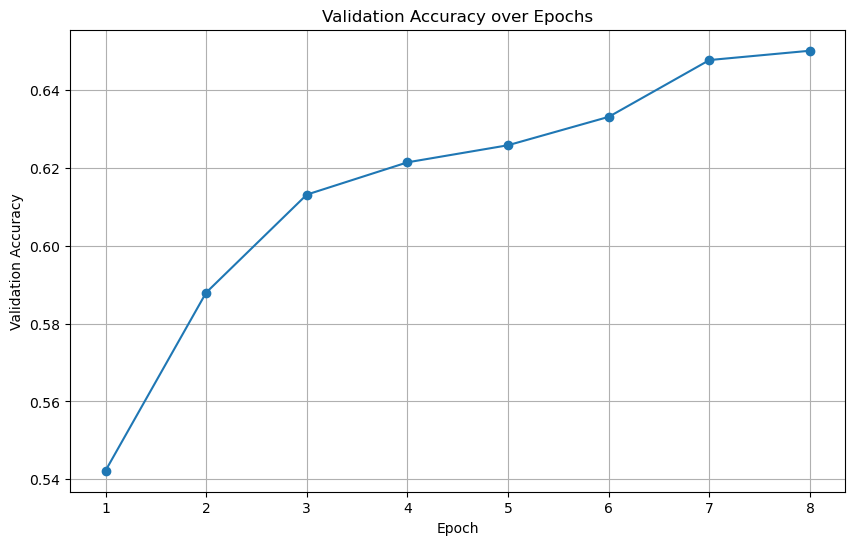

In [25]:
import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5, 6, 7, 8]

plt.figure(figsize=(10, 6))

plt.plot(epochs, accuracy, marker='o')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.grid()

plt.show()

In [15]:
# Testing
model.eval()
with torch.no_grad():
    test_predictions = []
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        predicted_labels = torch.argmax(outputs.logits, dim=1)
        test_predictions.extend(predicted_labels.tolist())

test_accuracy = (sum([1 if pred == true_label else 0 for pred, true_label in zip(test_predictions, test_label_ids)]) / len(test_label_ids))
print(f"Testing Accuracy: {test_accuracy:.4f}")

Testing Accuracy: 0.6489


In [16]:
new_df1 = filterdf[filterdf['year'].dt.year == 2020]
new_df1=new_df1.reset_index(drop=True)

In [17]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
max_seq_length = 128
batch_size = 6
learning_rate = 5e-7
# Sample dataset
songs = new_df1['processed_lyrics']  # List of song lyrics
genres = new_df1['genre'] # List of corresponding genre labels
num_classes=len(set(new_df1['genre']))
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(songs, genres, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)

# Move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Convert genre labels to numeric IDs
label2id = {genre: i for i, genre in enumerate(set(y_train))}
train_label_ids = [label2id[label] for label in y_train]
val_label_ids = [label2id[label] for label in y_val]
test_label_ids = [label2id[label] for label in y_test]

# Tokenize and encode the lyrics
train_inputs = tokenizer(list(X_train), padding=True, truncation=True, return_tensors="pt", max_length=128)
val_inputs = tokenizer(list(X_val), padding=True, truncation=True, return_tensors="pt", max_length=128)
test_inputs = tokenizer(list(X_test), padding=True, truncation=True, return_tensors="pt", max_length=128)

train_data = torch.utils.data.TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], torch.tensor(train_label_ids))
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

val_data = torch.utils.data.TensorDataset(val_inputs['input_ids'], val_inputs['attention_mask'], torch.tensor(val_label_ids))
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)

test_data = torch.utils.data.TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], torch.tensor(test_label_ids))
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

# Train the model
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

criterion = torch.nn.CrossEntropyLoss()
best_val_loss = float('inf')  # Initialize with a high value
best_model_weights = None
# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.1)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = criterion(outputs.logits, labels)  # Calculate the loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    # Validation
    model.eval()
    with torch.no_grad():
        val_losses = []
        val_predictions = []
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            val_loss = criterion(outputs.logits, labels)
            val_losses.append(val_loss.item())
            predicted_labels = torch.argmax(outputs.logits, dim=1)
            val_predictions.extend(predicted_labels.tolist())
        avg_val_loss = sum(val_losses) / len(val_losses)
        val_accuracy = (sum([1 if pred == true_label else 0 for pred, true_label in zip(val_predictions, val_label_ids)]) / len(val_label_ids))
        print(f"Epoch {epoch+1} - Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        # Learning rate scheduling
        scheduler.step(avg_val_loss)

        # Save best model weights
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_weights = model.state_dict()
            torch.save(best_model_weights, 'best_model_weights2020.pth')
        else:
            # If validation loss increases for a certain number of consecutive epochs, stop training
            early_stopping_patience = 3
            if epoch >= early_stopping_patience:
                print(f"Validation loss hasn't improved for {early_stopping_patience} epochs. Stopping.")
                break

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Epoch 1 - Validation Loss: 1.1465, Validation Accuracy: 0.5282
Epoch 2 - Validation Loss: 1.0298, Validation Accuracy: 0.5818
Epoch 3 - Validation Loss: 1.0050, Validation Accuracy: 0.5874
Epoch 4 - Validation Loss: 0.9650, Validation Accuracy: 0.6141
Epoch 5 - Validation Loss: 0.9473, Validation Accuracy: 0.6185
Epoch 6 - Validation Loss: 0.9412, Validation Accuracy: 0.6211
Epoch 7 - Validation Loss: 0.9319, Validation Accuracy: 0.6267
Epoch 8 - Validation Loss: 0.9325, Validation Accuracy: 0.6257
Validation loss hasn't improved for 3 epochs. Stopping.


In [18]:
# Testing
model.eval()
with torch.no_grad():
    test_predictions = []
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        predicted_labels = torch.argmax(outputs.logits, dim=1)
        test_predictions.extend(predicted_labels.tolist())

test_accuracy = (sum([1 if pred == true_label else 0 for pred, true_label in zip(test_predictions, test_label_ids)]) / len(test_label_ids))
print(f"Testing Accuracy: {test_accuracy:.4f}")

Testing Accuracy: 0.6232


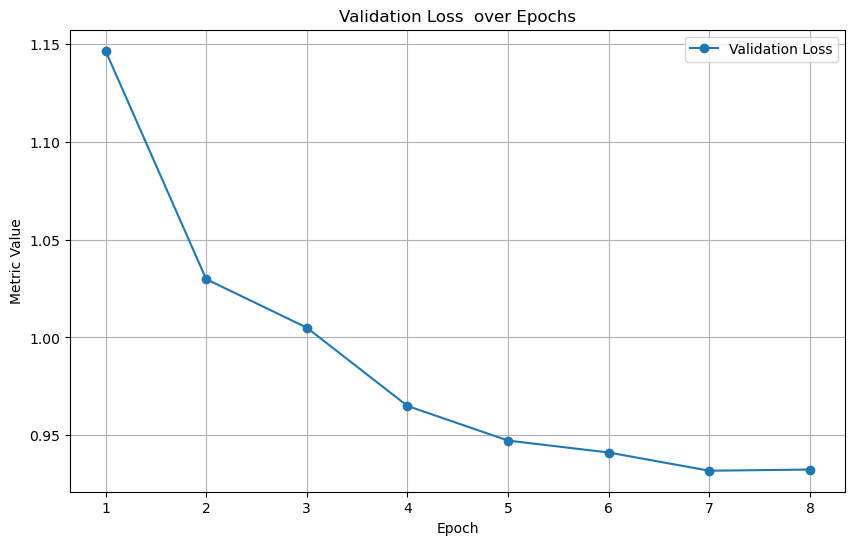

In [28]:
import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5, 6, 7, 8]

plt.figure(figsize=(10, 6))

plt.plot(epochs, avg_loss, marker='o', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Validation Loss  over Epochs')
plt.legend()
plt.grid()

plt.show()

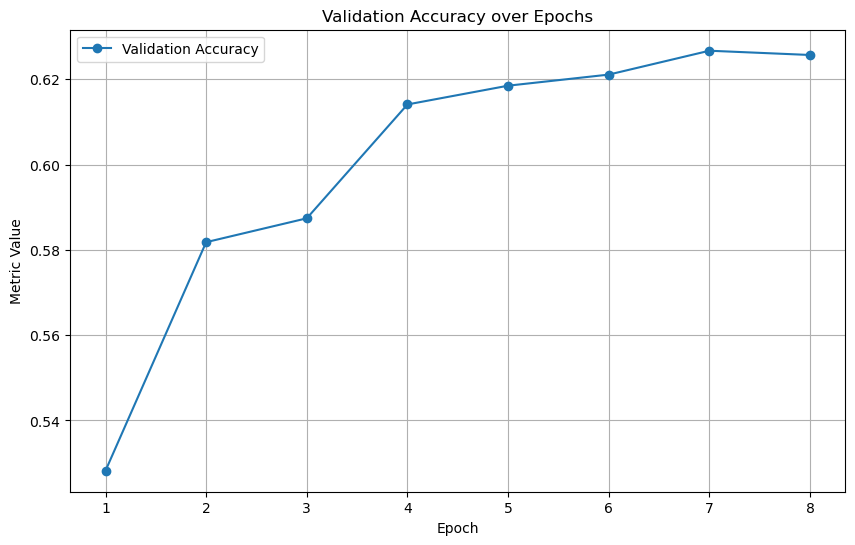

In [29]:
import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5, 6, 7, 8]

plt.figure(figsize=(10, 6))

plt.plot(epochs, accuracy, marker='o', label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.grid()

plt.show()